<a href="https://colab.research.google.com/github/florianaewing/CSB430SWIWinter2026/blob/main/Riipen/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis Report

# Data Loading - 2023 US Civil Flights

In [1]:
import os
import pandas as pd
import kagglehub

# Download dataset via kagglehub
dataset_path = kagglehub.dataset_download(
    "bordanova/2023-us-civil-flights-delay-meteo-and-aircraft"
)

print("Dataset downloaded to:")
print(dataset_path)

# List CSV files
csv_files = [f for f in os.listdir(dataset_path) if f.endswith(".csv")]

print("\nCSV files found:")
for f in csv_files:
    print(f"- {f}")

# Quick overview (same EDA logic as your original code)
for file in csv_files:
    try:
        df = pd.read_csv(os.path.join(dataset_path, file))

        print(f"\n===== QUICK OVERVIEW FOR {file} =====\n")
        print(f"Shape: {df.shape[0]} rows x {df.shape[1]} columns\n")

        print("Columns:")
        for col in df.columns:
            print(f"- {col}")

        print("\nInfo:\n")
        print(df.info(), "\n")

        print("First 5 rows:\n")
        print(df.head(), "\n")

        print("===== END OF QUICK OVERVIEW =====\n")

    except Exception as e:
        print(f"Error while processing {file}: {e}")


Using Colab cache for faster access to the '2023-us-civil-flights-delay-meteo-and-aircraft' dataset.
Dataset downloaded to:
/kaggle/input/2023-us-civil-flights-delay-meteo-and-aircraft

CSV files found:
- US_flights_2023.csv
- airports_geolocation.csv
- weather_meteo_by_airport.csv
- Cancelled_Diverted_2023.csv
- maj us flight - january 2024.csv

===== QUICK OVERVIEW FOR US_flights_2023.csv =====

Shape: 6743404 rows x 24 columns

Columns:
- FlightDate
- Day_Of_Week
- Airline
- Tail_Number
- Dep_Airport
- Dep_CityName
- DepTime_label
- Dep_Delay
- Dep_Delay_Tag
- Dep_Delay_Type
- Arr_Airport
- Arr_CityName
- Arr_Delay
- Arr_Delay_Type
- Flight_Duration
- Distance_type
- Delay_Carrier
- Delay_Weather
- Delay_NAS
- Delay_Security
- Delay_LastAircraft
- Manufacturer
- Model
- Aicraft_age

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6743404 entries, 0 to 6743403
Data columns (total 24 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   FlightDate    

# Data Description

The dataset contains multiple CSV files that provide complementary information about US civil flights. The main file, US_flights_2023.csv, records over 6.7 million flights with details on departure and arrival times, delays, aircraft information, and distances.

Cancelled_Diverted_2023.csv focuses on flight cancellations and diversions, with just over 100,000 entries.

maj us flight - january 2024.csv contains approximately half a million flights from January 2024, including aircraft manufacturer and age.

airports_geolocation.csv provides latitude and longitude for 364 airports, along with city and state information.

Finally, weather_meteo_by_airport.csv contains daily weather measurements for airports, including temperature, precipitation, wind, and pressure.

In [2]:
import os
import pandas as pd
import numpy as np
import kagglehub

# List CSV files
csv_files = [f for f in os.listdir(dataset_path) if f.endswith(".csv")]

print("\nCSV files found:")
for f in csv_files:
    print(f"- {f}")

def dataset_summary(df):
    print("===== DATASET SUMMARY =====\n")
    print(f"Shape: {df.shape[0]} rows x {df.shape[1]} columns\n")

    # Missing values
    missing_count = df.isna().sum()
    missing_percent = (missing_count / len(df) * 100).round(2)
    missing_report = pd.DataFrame({
        'Missing Count': missing_count,
        'Missing %': missing_percent
    }).sort_values('Missing Count', ascending=False)
    print(">>> Missing Values:\n", missing_report, "\n")

    # Duplicate rows
    dup_count = df.duplicated().sum()
    print(f">>> Duplicate Rows: {dup_count}\n")

    # Data types
    print(">>> Data Types:\n", df.dtypes, "\n")

    # Basic statistics (numerical columns)
    if df.select_dtypes(include=np.number).shape[1] > 0:
        print(">>> Basic Statistics (numerical columns):\n", df.describe().T, "\n")

    # Basic statistics (categorical columns)
    if df.select_dtypes(include='object').shape[1] > 0:
        print(">>> Basic Statistics (categorical columns):\n", df.describe(include='object').T, "\n")

    print("===== END OF REPORT =====\n\n")

# Iterate over each CSV file to generate summary
for file in csv_files:
    try:
        df = pd.read_csv(os.path.join(dataset_path, file))
        print(f"\n===== SUMMARY FOR {file} =====\n")
        dataset_summary(df)
    except Exception as e:
        print(f"Error while processing {file}: {e}\n")



CSV files found:
- US_flights_2023.csv
- airports_geolocation.csv
- weather_meteo_by_airport.csv
- Cancelled_Diverted_2023.csv
- maj us flight - january 2024.csv

===== SUMMARY FOR US_flights_2023.csv =====

===== DATASET SUMMARY =====

Shape: 6743404 rows x 24 columns

>>> Missing Values:
                     Missing Count  Missing %
FlightDate                      0        0.0
Day_Of_Week                     0        0.0
Airline                         0        0.0
Tail_Number                     0        0.0
Dep_Airport                     0        0.0
Dep_CityName                    0        0.0
DepTime_label                   0        0.0
Dep_Delay                       0        0.0
Dep_Delay_Tag                   0        0.0
Dep_Delay_Type                  0        0.0
Arr_Airport                     0        0.0
Arr_CityName                    0        0.0
Arr_Delay                       0        0.0
Arr_Delay_Type                  0        0.0
Flight_Duration                 

# Key Metrics from each File

airports_geolocation.csv has 364 complete rows with location data and no duplicates.

Cancelled_Diverted_2023.csv has 104,488 rows, no missing values, 945 duplicates, mostly cancelled flights, skewed delay distributions, 15 airlines, and ~345 airports.

maj us flight - january 2024.csv contains 527,197 rows, no missing values, three duplicates, skewed delay metrics, and aircraft details (manufacturer, model, age ~14 years).

US_flights_2023.csv has 6,743,404 rows, no missing values, 31 duplicates, similar delay distributions, and consistent categorical data.

weather_meteo_by_airport.csv has 132,860 rows, no missing values, and complete weather metrics per airport

In the flight datasets (Cancelled_Diverted_2023.csv, maj us flight - january 2024.csv, US_flights_2023.csv), median departure and arrival delays are close to zero (or negative in January 2024), while maximum delays reach thousands of minutes (e.g., 3,024–4,413 minutes). This suggests that most flights have minimal delay, but a small number of flights experience extreme delays.

Delay components broken down by cause—
carrier,
weather,
NAS,
security,
last aircraft
—show similar patterns: mostly zero or very low values, with occasional extreme spikes.

# Data Processing and Visualization for Information Specific to Flight Delays

This code loads and merges U.S. civil flight, airport, and weather datasets from 2023 and January 2024, standardizes column names, and converts date fields to datetime objects. It adds latitude and longitude for departure and arrival airports and attaches corresponding weather data by date and airport. The code then calculates descriptive statistics and skewness for key delay metrics, computes median departure delays by airline and airport, and evaluates correlations between departure delays and weather variables. The result is a cleaned, merged dataset with initial analyses that summarize flight delays and their potential relationship to weather.


=== Delay Summary ===
          Dep_Delay     Arr_Delay  Delay_Carrier  Delay_Weather     Delay_NAS  \
count  7.270601e+06  7.270601e+06   7.270601e+06   7.270601e+06  7.270601e+06   
mean   1.224739e+01  6.710484e+00   5.188379e+00   7.593605e-01  2.615973e+00   
std    5.507083e+01  5.710281e+01   3.643545e+01   1.464936e+01  1.511693e+01   
min   -9.900000e+01 -1.190000e+02   0.000000e+00   0.000000e+00  0.000000e+00   
25%   -5.000000e+00 -1.500000e+01   0.000000e+00   0.000000e+00  0.000000e+00   
50%   -2.000000e+00 -6.000000e+00   0.000000e+00   0.000000e+00  0.000000e+00   
75%    9.000000e+00  9.000000e+00   0.000000e+00   0.000000e+00  0.000000e+00   
90%    4.100000e+01  4.100000e+01   5.000000e+00   0.000000e+00  0.000000e+00   
99%    2.060000e+02  2.050000e+02   1.050000e+02   5.000000e+00  5.500000e+01   
max    4.413000e+03  4.405000e+03   3.957000e+03   1.860000e+03  1.708000e+03   

       Delay_Security  Delay_LastAircraft  
count    7.270601e+06        7.270601e+06

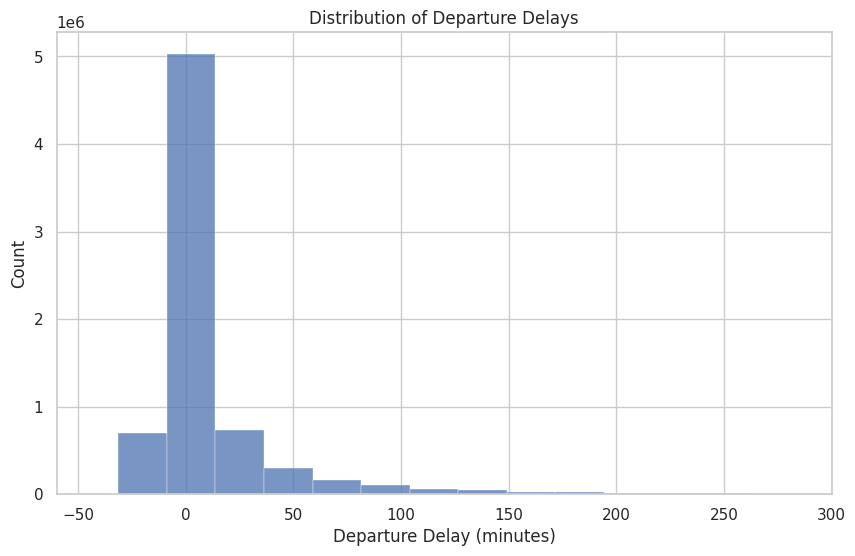

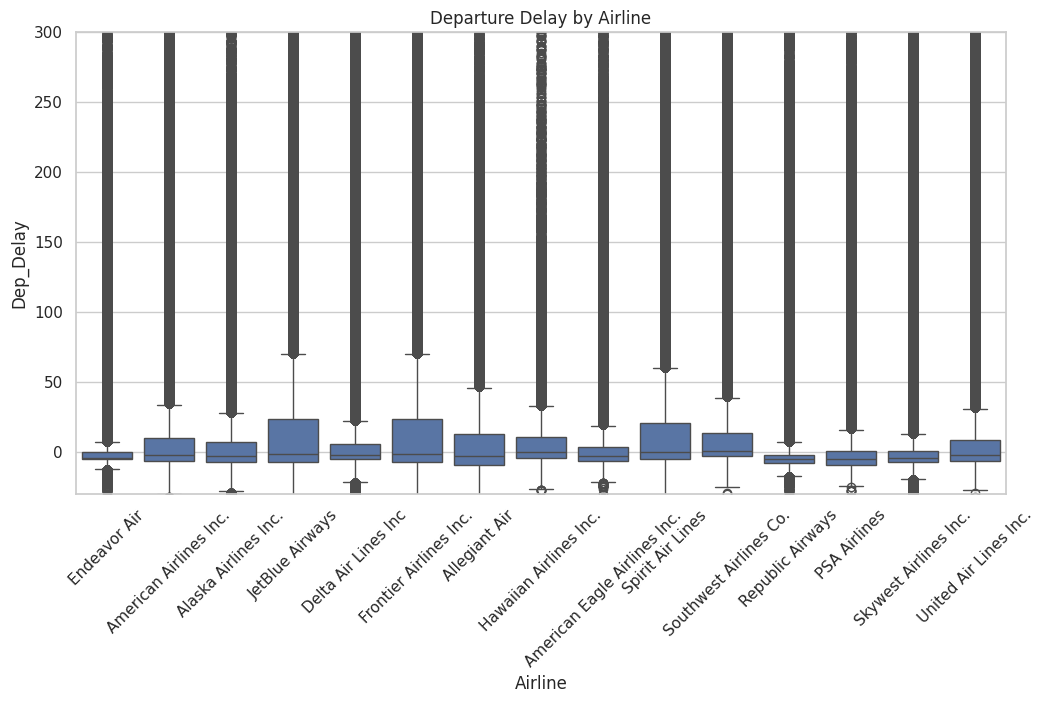

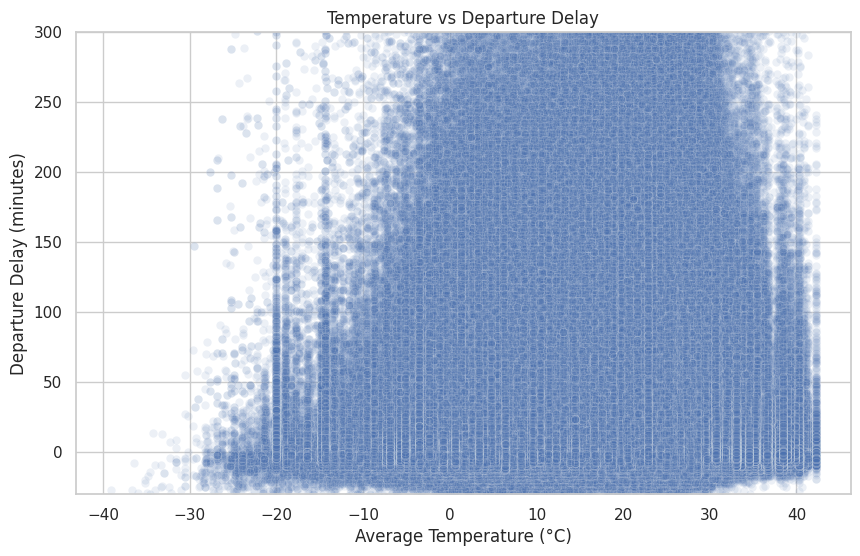

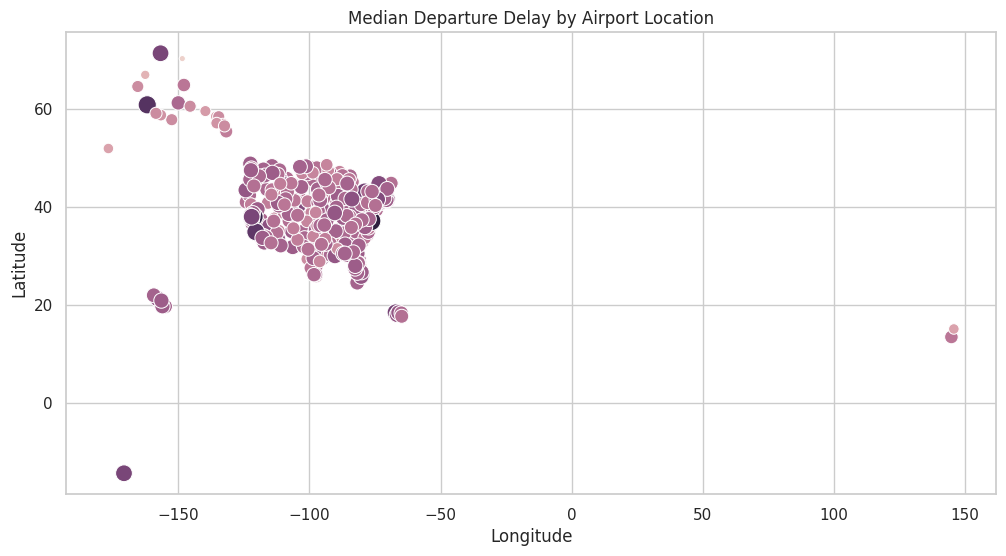

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset_path = "/kaggle/input/2023-us-civil-flights-delay-meteo-and-aircraft"

flights_2023 = pd.read_csv(os.path.join(dataset_path, "US_flights_2023.csv"))
flights_jan2024 = pd.read_csv(os.path.join(dataset_path, "maj us flight - january 2024.csv"))
cancelled_diverted = pd.read_csv(os.path.join(dataset_path, "Cancelled_Diverted_2023.csv"))
airports = pd.read_csv(os.path.join(dataset_path, "airports_geolocation.csv"))
weather = pd.read_csv(os.path.join(dataset_path, "weather_meteo_by_airport.csv"))

for df in [flights_2023, flights_jan2024, cancelled_diverted, weather]:
    if 'FlightDate' in df.columns:
        df['FlightDate'] = pd.to_datetime(df['FlightDate'])
    if 'time' in df.columns:
        df['time'] = pd.to_datetime(df['time'])

flights_2023.rename(columns={'Aicraft_age':'Aircraft_age'}, inplace=True)
flights_jan2024.rename(columns={'Aicraft_age':'Aircraft_age'}, inplace=True)

flights = pd.concat([flights_2023, flights_jan2024], ignore_index=True)

flights = flights.merge(
    airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE']],
    left_on='Dep_Airport', right_on='IATA_CODE', how='left'
)
flights.rename(columns={'LATITUDE':'Dep_LAT', 'LONGITUDE':'Dep_LON'}, inplace=True)
flights.drop(columns=['IATA_CODE'], inplace=True)

flights = flights.merge(
    airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE']],
    left_on='Arr_Airport', right_on='IATA_CODE', how='left'
)
flights.rename(columns={'LATITUDE':'Arr_LAT', 'LONGITUDE':'Arr_LON'}, inplace=True)
flights.drop(columns=['IATA_CODE'], inplace=True)

flights = flights.merge(
    weather.rename(columns={'time':'FlightDate', 'airport_id':'Dep_Airport'}),
    on=['FlightDate','Dep_Airport'], how='left', suffixes=('','_DepWeather')
)
flights = flights.merge(
    weather.rename(columns={'time':'FlightDate', 'airport_id':'Arr_Airport'}),
    on=['FlightDate','Arr_Airport'], how='left', suffixes=('','_ArrWeather')
)

delay_cols = ['Dep_Delay','Arr_Delay','Delay_Carrier','Delay_Weather',
              'Delay_NAS','Delay_Security','Delay_LastAircraft']

delay_summary = flights[delay_cols].describe(percentiles=[0.25,0.5,0.75,0.9,0.99])
print("\n=== Delay Summary ===")
print(delay_summary)

for col in delay_cols:
    skew_val = flights[col].skew()
    print(f"{col} skewness: {skew_val:.2f}")

median_by_airline = flights.groupby('Airline')['Dep_Delay'].median().sort_values(ascending=False)
print("\nMedian Dep_Delay by Airline:")
print(median_by_airline)

median_by_dep_airport = flights.groupby('Dep_Airport')['Dep_Delay'].median().sort_values(ascending=False)
print("\nMedian Dep_Delay by Departure Airport:")
print(median_by_dep_airport.head(10))

weather_cols = ['tavg','tmin','tmax','prcp','snow','wdir','wspd','pres']
corr_weather = flights[weather_cols + ['Dep_Delay']].corr()['Dep_Delay'].sort_values(ascending=False)
print("\nCorrelation of weather variables with Dep_Delay:")
print(corr_weather)


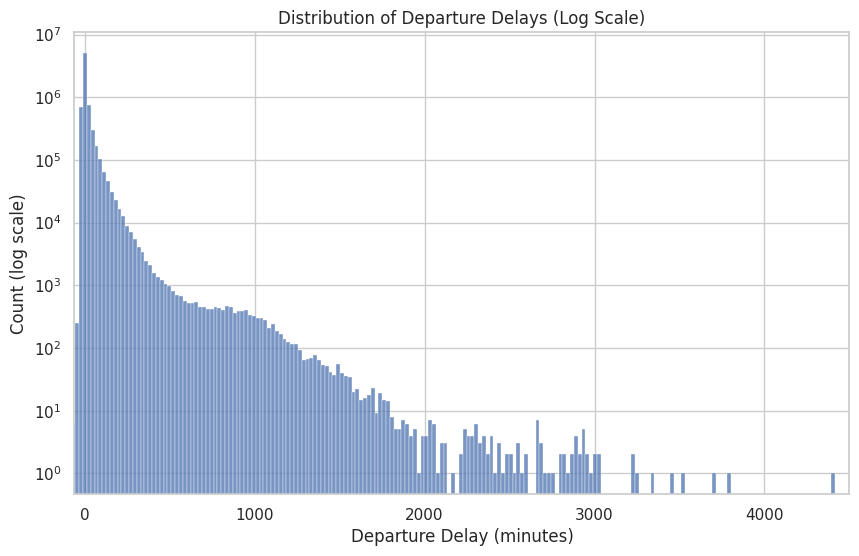

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(flights['Dep_Delay'], bins=200, kde=False)
plt.xlim(-60, 4500)  # focus on common delays
plt.yscale('log')  # logarithmic y-axis
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Count (log scale)")
plt.title("Distribution of Departure Delays (Log Scale)")
plt.show()

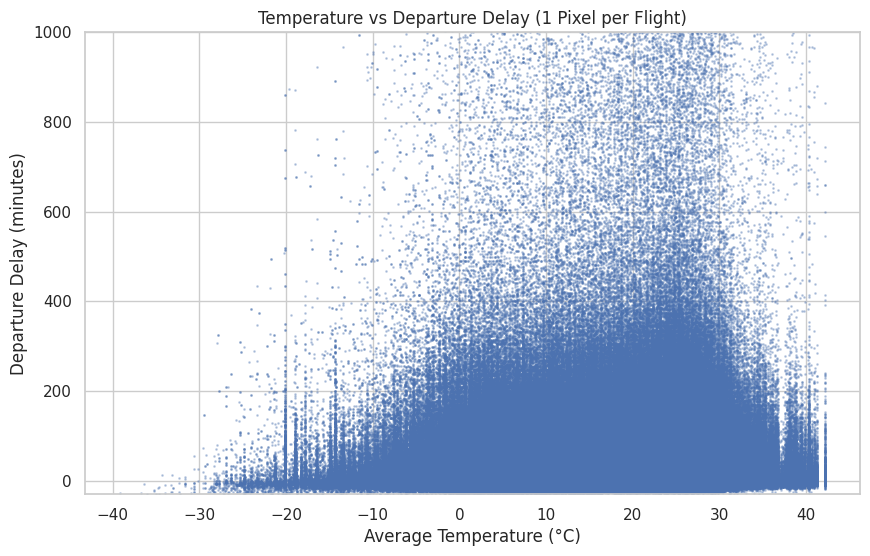

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(flights['tavg'], flights['Dep_Delay'], s=1, alpha=0.3)  # s=1 -> 1 pixel per point
plt.ylim(-30, 1000)
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Departure Delay (minutes)")
plt.title("Temperature vs Departure Delay (1 Pixel per Flight)")
plt.show()


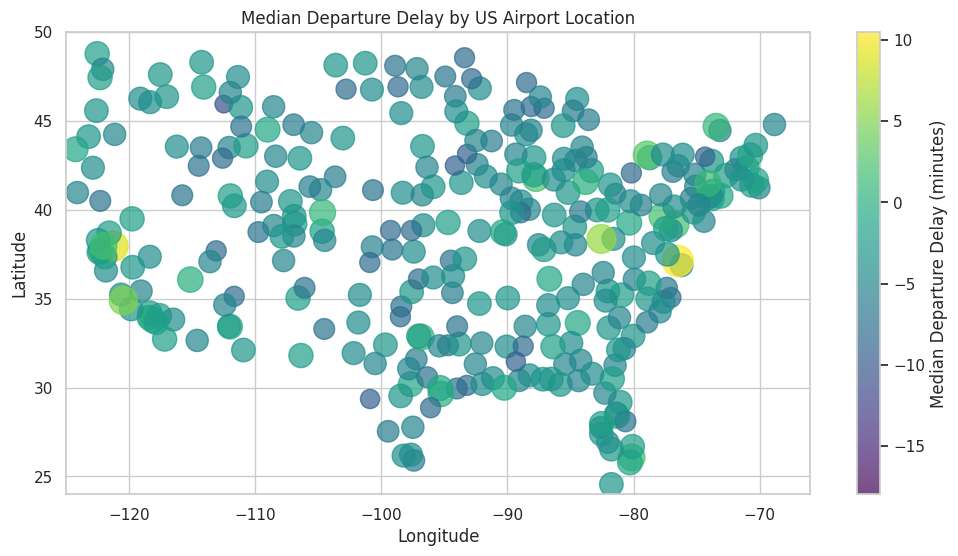

In [20]:
# Merge median departure delay with US airports
airport_delay_map = flights.groupby('Dep_Airport')['Dep_Delay'].median().reset_index()
us_airports = airports[airports['COUNTRY'] == 'USA'][['IATA_CODE', 'LATITUDE', 'LONGITUDE']]

airport_delay_map = airport_delay_map.merge(
    us_airports,
    left_on='Dep_Airport',
    right_on='IATA_CODE',
    how='inner'
)

# Normalize marker sizes for visibility
min_size = 50   # minimum point size
max_size = 500  # maximum point size
delay_min = airport_delay_map['Dep_Delay'].min()
delay_max = airport_delay_map['Dep_Delay'].max()
sizes = ((airport_delay_map['Dep_Delay'] - delay_min) / (delay_max - delay_min)) * (max_size - min_size) + min_size

plt.figure(figsize=(12,6))
scatter = plt.scatter(
    x=airport_delay_map['LONGITUDE'],
    y=airport_delay_map['LATITUDE'],
    s=sizes,                       # scaled marker sizes
    c=airport_delay_map['Dep_Delay'],
    cmap='viridis',
    alpha=0.7
)

plt.colorbar(scatter, label='Median Departure Delay (minutes)')
plt.title("Median Departure Delay by US Airport Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Shift view to include continental US (west coast to east coast)
plt.xlim(-125, -66)  # longitudes from west coast to east coast
plt.ylim(24, 50)     # latitudes from southern US to northern continental US

plt.show()
